<a id='intro'></a>
## Introduction

### Dataset Description 

As a passionate film enthusiast, today I bring you an analysis of a dataset related to movies. This dataset is rich in information about films that have been screened throughout history, including details such as directors, cast, revenue, and budget. To gain a deeper understanding of this dataset, let's analyze it together.

### Question(s) for Analysis
Data Wrangling:

- Does dataset have any missing or duplicate values?

- Does dataset have any outliers?

- Does dataset have any wrong data types?

Exploratory Data Analysis:

- Which genres are most popular from year to year? 

- What are the relationship between the age, gender and the no-show rate?What kinds of properties are associated with movies that have high revenues?

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [10]:
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
df.shape

(10866, 21)

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

In [14]:
# Handling duplicate data
df.duplicated().sum()

1

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
# Handling null data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [20]:
# Standardized data
df['cast'] = df['cast'].str.replace('|', ',')
df['production_companies'] = df['production_companies'].str.replace('|', ',')
df['genres'] = df['genres'].str.replace('|', ',')

/tmp/ipykernel_13/2436475099.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cast'] = df['cast'].str.replace('|', ',')
/tmp/ipykernel_13/2436475099.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_companies'] = df['production_companies'].str.replace('|', ',')
/tmp/ipykernel_13/2436475099.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|', ',')


In [21]:
# Processing data in "scientific notation form"
df['revenue_adj'] = df['revenue_adj'].apply(lambda x: "{:.2f}".format(x))
df['budget_adj'] = df['budget_adj'].apply(lambda x: "{:.2f}".format(x))

In [22]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",6/9/15,5562,6.5,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",5/13/15,6185,7.1,2015,137999939.28,348161292.49
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago...",3/18/15,2480,6.3,2015,101199955.47,271619025.41


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year? 

In [23]:
genres_list = list(df['genres'])

In [24]:
flat_genres = [genre.split(',') for genre in genres_list]
flat_genres = [genre for sublist in flat_genres for genre in sublist]

In [25]:
flat_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Comedy',


In [26]:
genre_counts = Counter(flat_genres)

In [27]:
most_common_genre, count = genre_counts.most_common(1)[0]

In [28]:
print(f"Most appearing genre: {most_common_genre} ({count})")

Most appearing genre: Drama (838)


In [29]:
# Plotting the results
labels = list(genre_counts.keys())
values = list(genre_counts.values())

In [30]:
sorted_indices = np.argsort(values)[::-1]
sorted_labels = [labels[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

In [31]:
# Normalize values to use for gradient coloring
normalized_values = np.array(sorted_values) / max(sorted_values)

# Create a gradient color map
colors = plt.cm.Reds(normalized_values)

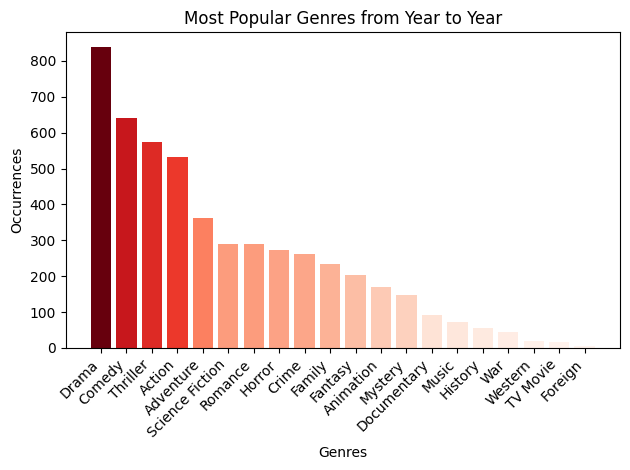

In [32]:
plt.bar(sorted_labels, sorted_values, color=colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title('Most Popular Genres from Year to Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What kinds of properties are associated with movies that have high revenues?

In [33]:
df_revenues_sorted = df.sort_values(by='revenue', ascending=False)

In [34]:
df_revenues_sorted.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,"Action,Adventure,Fantasy,Science Fiction","Ingenious Film Partners,Twentieth Century Fox ...",12/10/09,8458,7.1,2009,240886902.89,2827123750.41
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",12/15/15,5292,7.5,2015,183999919.04,1902723129.80
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,"Kate Winslet,Leonardo DiCaprio,Frances Fisher,...",http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,"Drama,Romance,Thriller","Paramount Pictures,Twentieth Century Fox Film ...",11/18/97,4654,7.3,1997,271692064.21,2506405735.42
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...",http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,"Science Fiction,Action,Adventure",Marvel Studios,4/25/12,8903,7.3,2012,208943741.90,1443191435.21
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",6/9/15,5562,6.5,2015,137999939.28,1392445892.52


In [35]:
grouped_df = df.groupby('original_title').agg({'revenue': 'sum', 'budget': 'sum','popularity':'sum','runtime':'sum','vote_count':'sum'}).reset_index()
sorted_grouped_df = grouped_df.sort_values(by='revenue', ascending=False)
sorted_grouped_df.head(10)

,original_title,revenue,budget,popularity,runtime,vote_count
169,Avatar,2781505847,237000000,9.432768,162,8458
1372,Star Wars: The Force Awakens,2068178225,200000000,11.173104,136,5292
1826,Titanic,1845034188,200000000,4.355219,194,4654
1451,The Avengers,1519557910,220000000,7.637767,143,8903
823,Jurassic World,1513528810,150000000,32.985763,124,5562
584,Furious 7,1506249360,190000000,9.335014,137,2947
170,Avengers: Age of Ultron,1405035767,280000000,5.944927,141,4304
663,Harry Potter and the Deathly Hallows: Part 2,1327817822,125000000,5.711315,130,3750
576,Frozen,1277284869,150000000,6.651158,195,3691
787,Iron Man 3,1215439994,200000000,4.946136,130,6882


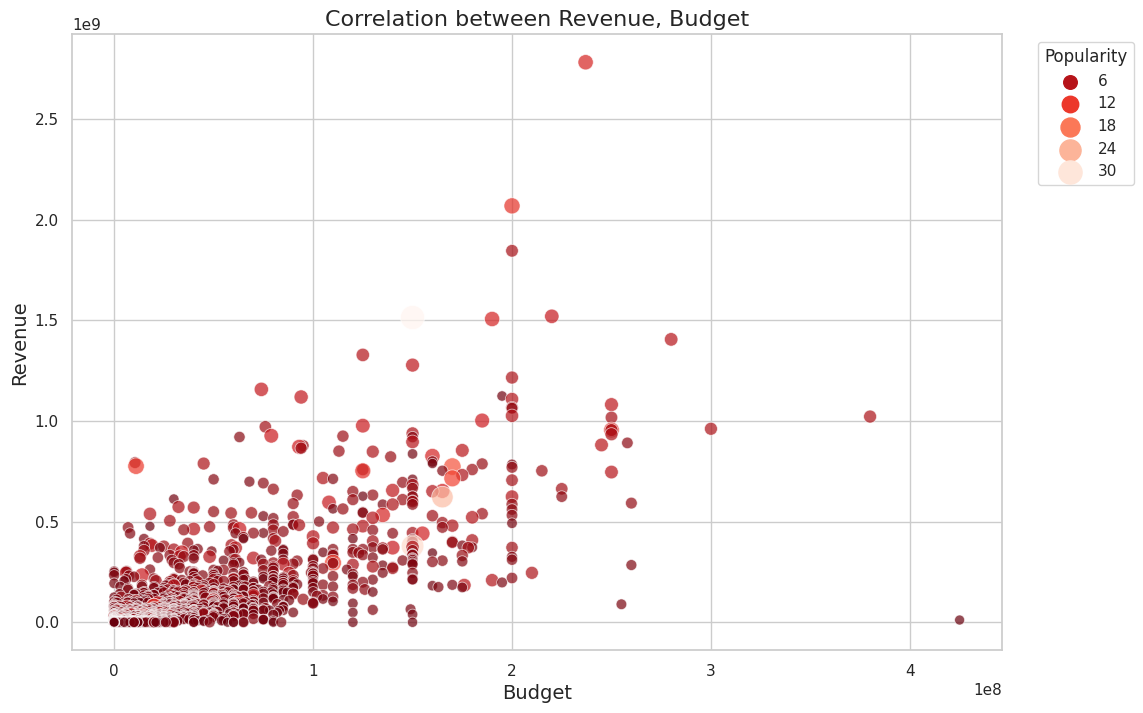

In [36]:
def scatter_chart(arg):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=arg, y='revenue', data=sorted_grouped_df, hue='popularity', palette='Reds_r', size='popularity', sizes=(50, 300), alpha=0.7)
    plt.xlabel(f"{arg.title()}", fontsize=14)
    plt.ylabel('Revenue', fontsize=14)
    plt.title('Correlation between Revenue, Budget', fontsize=16)
    plt.legend(title='Popularity', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()
    
scatter_chart('budget')

The chart illustrates the correlation between revenue and production budget. According to the statistical data in the dataset, it can be observed that movies with higher revenue are often associated with a significant investment in production budget. Assuming a film receives substantial funding, it is likely to have a larger audience due to extensive promotional spending. Additionally, the visual quality and special effects are expected to be superior, given the higher production budget.

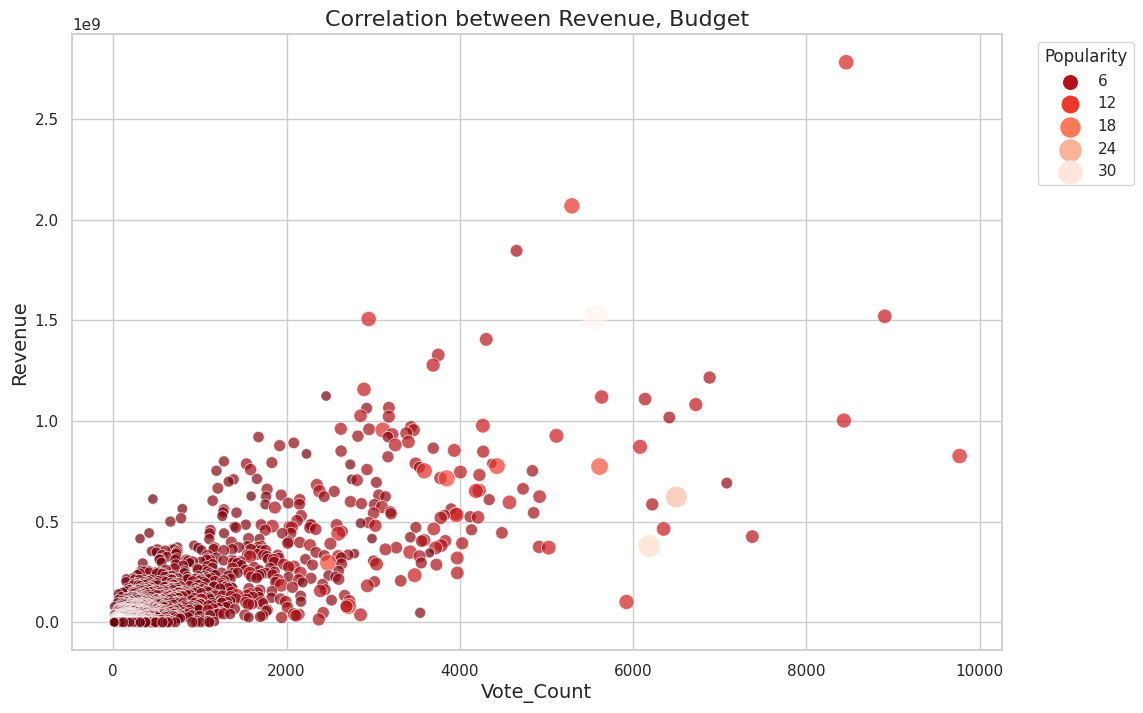

In [37]:
scatter_chart('vote_count')

The chart illustrates the correlation between revenue and the number of votes. Clearly, based on the statistical data in the dataset, it can be observed that movies with higher revenue tend to receive more votes!

## Conclusions
> Through the analysis, we can observe that the most frequently appearing film genre is "Drama", indicating a significant appeal to audiences and directors alike. Indeed, this genre has brought considerable entertainment value and contributed to enriching everyday knowledge. It authentically reflects societal events, keeping up with current trends. Therefore, it is truly an immensely captivating film genre!

> Furthermore, we have witnessed the correlation between attributes in the dataset closely related to the film's revenue. As analyzed, films with higher investment, extensive advertising, and greater visibility tend to generate more revenue. Another crucial factor is the film's release time, where longer-running films generally earn more revenue. From these analyses, we can conclude that the dataset accurately reflects aspects of real life. We can draw valuable lessons to apply in the future. Perhaps, you might even create a film that achieves remarkable success!

## Limitations

The figures in the dataset seem to contain uncommon characters, and the presentation of its numerical values in scientific notation can be confusing for readers. I had to apply the knowledge gained from coursework and conduct additional research to address these issues.

In [1]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 773789 bytes to Investigate_a_Dataset.html
